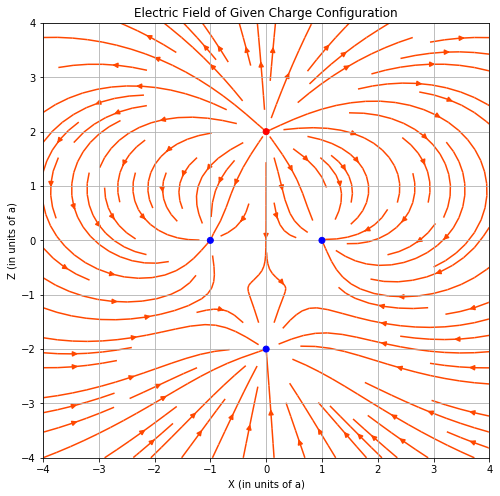

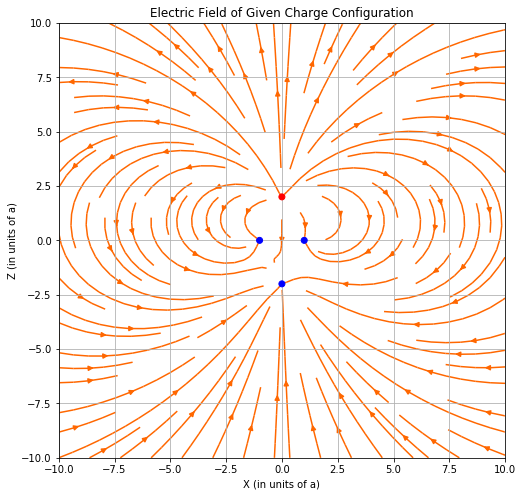

In [41]:
import numpy as np
import matplotlib.pyplot as plt

#Class that describes a particle's position and charge and calculates the electric field at a/many points
class chargedParticle:
    Position = (0, 0)
    Charge = 0
    k = 8.988e9
    
    def __init__(self, q, pos):
        self.Charge = q
        self.Position = pos
        
    def getEFieldX(self, X, Y):
        separation = np.sqrt((X-self.Position[0])**2+(Y-self.Position[1])**2)
        return self.Charge*self.k*(X-self.Position[0])/(separation**3)
    
    def getEFieldY(self, X, Y):
        separation = np.sqrt((X-self.Position[0])**2+(Y-self.Position[1])**2)
        return self.Charge*self.k*(Y-self.Position[1])/(separation**3)
    
    def getPosition(self):
        return self.Position

#Initialize our particles
northParticle = chargedParticle(3, (0, 2))
westParticle = chargedParticle(-1, (-1, 0))
southParticle = chargedParticle(-1, (0, -2))
eastParticle = chargedParticle(-1, (1, 0))

#Initialize our X and Y values
xValuesS = np.linspace(-4, 4, 1000)
yValuesS = np.linspace(-4, 4, 1000)
xValuesS, yValuesS = np.meshgrid(xValuesS, yValuesS)

xValuesL = np.linspace(-10, 10, 1000)
yValuesL = np.linspace(-10, 10, 1000)
xValuesL, yValuesL = np.meshgrid(xValuesL, yValuesL)

#Find all parts of the x-component of the e-field
fullFieldXL = northParticle.getEFieldX(xValuesL, yValuesL)
fullFieldXL += westParticle.getEFieldX(xValuesL, yValuesL)
fullFieldXL += southParticle.getEFieldX(xValuesL, yValuesL)
fullFieldXL += eastParticle.getEFieldX(xValuesL, yValuesL)

fullFieldXS = northParticle.getEFieldX(xValuesS, yValuesS)
fullFieldXS += westParticle.getEFieldX(xValuesS, yValuesS)
fullFieldXS += southParticle.getEFieldX(xValuesS, yValuesS)
fullFieldXS += eastParticle.getEFieldX(xValuesS, yValuesS)

#Find all parts of the y-component of the e-field
fullFieldYL = northParticle.getEFieldY(xValuesL, yValuesL)
fullFieldYL += westParticle.getEFieldY(xValuesL, yValuesL)
fullFieldYL += southParticle.getEFieldY(xValuesL, yValuesL)
fullFieldYL += eastParticle.getEFieldY(xValuesL, yValuesL)

fullFieldYS = northParticle.getEFieldY(xValuesS, yValuesS)
fullFieldYS += westParticle.getEFieldY(xValuesS, yValuesS)
fullFieldYS += southParticle.getEFieldY(xValuesS, yValuesS)
fullFieldYS += eastParticle.getEFieldY(xValuesS, yValuesS)

#Calculating the colors
colorL = (fullFieldXL+fullFieldYL)/(fullFieldXL[499, 499]+fullFieldYL[499, 499])*1000
colorS = (fullFieldXS+fullFieldYS)/(fullFieldXS[499, 499]+fullFieldYS[499, 499])*1000

#Plot the two fields.
fig = plt.figure(figsize = (8,8))
plt.streamplot(xValuesS, yValuesS, fullFieldXS, fullFieldYS, color=colorS, cmap='autumn', zorder=1)
plt.scatter([0, -1, 0, 1], [2, 0, -2, 0], c=['r', 'b', 'b', 'b'], zorder=100)
plt.grid()
plt.title('Electric Field of Given Charge Configuration')
plt.ylabel('Z (in units of a)')
plt.xlabel('X (in units of a)')
plt.show()

fig = plt.figure(figsize = (8,8))
plt.streamplot(xValuesL, yValuesL, fullFieldXL, fullFieldYL, color=colorL, cmap='autumn', zorder=1)
plt.scatter([0, -1, 0, 1], [2, 0, -2, 0], c=['r', 'b', 'b', 'b'], zorder=100)
plt.grid()
plt.title('Electric Field of Given Charge Configuration')
plt.ylabel('Z (in units of a)')
plt.xlabel('X (in units of a)')
plt.show()

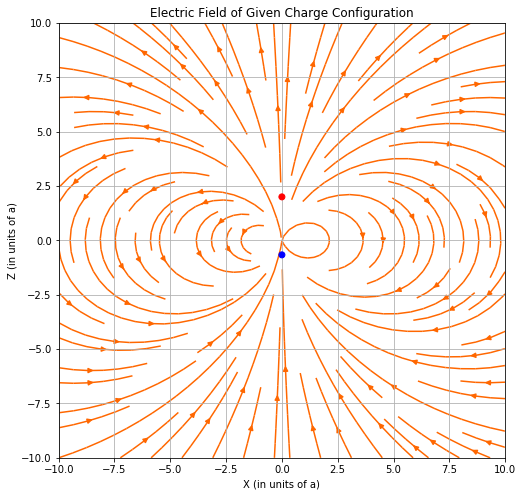

In [40]:
def electricField(x, z, half, q=1):
    k=8.988e9
    r = np.sqrt(x**2+z**2)
    t = np.arccos(z/r)
    rhoHat = (8*k*q*np.cos(t))/(r**3)
    thetaHat = (4*k*q*np.sin(t))/(r**3)
    return (rhoHat*np.sin(t)*half+thetaHat*np.cos(t)*half, rhoHat*np.cos(t)-thetaHat*np.sin(t))

xValues = np.linspace(-10, 10, 1000)
zValues = np.linspace(-10, 10, 1000)
xValues, zValues = np.meshgrid(xValues, zValues)

xField, zField = electricField(xValues, zValues, np.sign(xValues))

fig = plt.figure(figsize = (8,8))
plt.streamplot(xValues, yValues, xField, zField, color=colorL, cmap='autumn', zorder=1)
plt.scatter([0, 0], [2, -2/3], c=['r', 'b'], zorder=100)
plt.grid()
plt.title('Electric Field of Given Charge Configuration')
plt.ylabel('Z (in units of a)')
plt.xlabel('X (in units of a)')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()